In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kaushil268/disease-prediction-using-machine-learning --unzip


Dataset URL: https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning
License(s): DbCL-1.0
  0% 0.00/29.8k [00:00<?, ?B/s]
100% 29.8k/29.8k [00:00<00:00, 7.36MB/s]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
df_train = pd.read_csv('/content/Training.csv')

In [ ]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
df_train.shape

(4920, 134)

In [ ]:
df_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [ ]:
df_train = df_train.drop(columns='Unnamed: 133')

In [ ]:
df_train.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
df_train['prognosis'].nunique()

41

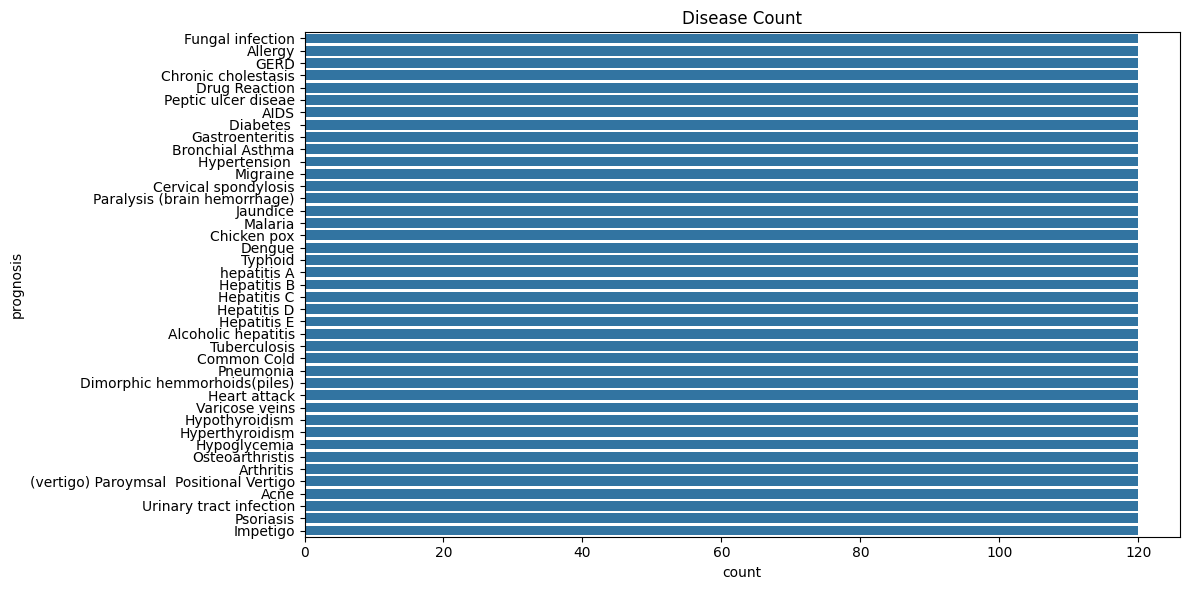

In [ ]:
# Plot number of cases per disease
plt.figure(figsize=(12,6))
sns.countplot(y='prognosis', data=df_train, order=df_train['prognosis'])
plt.title("Disease Count")
plt.tight_layout()
plt.show()

In [ ]:
X = df_train.drop(columns=['prognosis'])
y = df_train['prognosis']

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_
))


Test Accuracy: 100.00%

Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00

In [ ]:
df_test = pd.read_csv('/content/Testing.csv')

In [ ]:
X_test = df_test.drop(columns='prognosis')
Y_test = df_test['prognosis']

In [ ]:
y_test_encoded = le.fit_transform(Y_test)

In [ ]:
y_test_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(
    y_test_encoded,
    y_test_pred,
    target_names=le.classes_
))

Test Accuracy: 97.62%

Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00 

In [ ]:
import joblib

joblib.dump(rf_model, "disease_rf_model.pkl")
joblib.dump(le, "label_encoder.pkl")

In [ ]:
def predict_disease(user_symptom_vector):
    prediction = rf_model.predict(user_symptom_vector.reshape(1, -1))
    probability = rf_model.predict_proba(user_symptom_vector.reshape(1, -1))

    class_index = prediction[0]
    disease = le.inverse_transform([class_index])[0]
    confidence = np.max(probability)

    return disease, confidence


In [ ]:
disease, conf = predict_disease(X_test.iloc[0].values)
print(disease, conf)

Fungal infection 1.0


In [ ]:
pd.set_option('display.max_columns', None)
columns = df_train.columns.tolist()
print(columns)


['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow